In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data= pd.read_csv("/home/akofficialone/test.csv")
df= pd.DataFrame(data)

In [64]:
data.head()

,job,Salary,Category
0,Engineering Systems Analyst,25000,Engineering Jobs
1,Stress Engineer Glasgow,30000,Engineering Jobs
2,Modelling and simulation analyst,30000,Engineering Jobs
3,Engineering Systems Analyst / Mathematical Mod...,27500,Engineering Jobs
4,"Pioneer, Miser Engineering Systems Analyst",25000,Engineering Jobs


In [14]:
data.info()
#data.Category=='Engineering Jobs'
data.Category.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
job         9999 non-null object
Salary      10000 non-null int64
Category    10000 non-null object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


Healthcare & Nursing Jobs           3149
IT Jobs                             1414
Engineering Jobs                    1152
Accounting & Finance Jobs            606
HR & Recruitment Jobs                578
Hospitality & Catering Jobs          525
Sales Jobs                           426
Teaching Jobs                        342
Customer Services Jobs               257
Other/General Jobs                   236
Admin Jobs                           151
Trade & Construction Jobs            148
Scientific & QA Jobs                 129
Logistics & Warehouse Jobs           110
Manufacturing Jobs                   106
Travel Jobs                          100
Retail Jobs                           93
Legal Jobs                            88
PR, Advertising & Marketing Jobs      88
Consultancy Jobs                      80
Social work Jobs                      53
Property Jobs                         44
Energy, Oil & Gas Jobs                31
Charity & Voluntary Jobs              23
Creative & Desig

In [65]:
print(set(data['Category']))
data['Category'] = data['Category'].map({'Healthcare & Nursing Jobs': 1, 'IT Jobs': 2, 'Engineering Jobs':3,
'Accounting & Finance Jobs':4,'HR & Recruitment Jobs':5,'Hospitality & Catering Jobs':6,'Sales Jobs':7,'Teaching Jobs':8,'Customer Services Jobs':9,'Other/General Jobs':10,'Admin Jobs':11,'Trade & Construction Jobs':12,
                                         'Scientific & QA Jobs':13,'Logistics & Warehouse Jobs':14,'Manufacturing Jobs':15,'Travel Jobs':16,'Retail Jobs':17,'Legal Jobs':18,'PR, Advertising & Marketing Jobs':19,'Consultancy Jobs':20,'Social work Jobs':21,'Property Jobs':22,'Energy, Oil & Gas Jobs':23,'Charity & Voluntary Jobs':24,'Creative & Design Jobs':25,'Maintenance Jobs':26,'Graduate Jobs':27,'Domestic help & Cleaning Jobs':28}).astype(int)

{'Graduate Jobs', 'Hospitality & Catering Jobs', 'Engineering Jobs', 'Maintenance Jobs', 'Admin Jobs', 'Energy, Oil & Gas Jobs', 'Other/General Jobs', 'Legal Jobs', 'Domestic help & Cleaning Jobs', 'Consultancy Jobs', 'HR & Recruitment Jobs', 'Trade & Construction Jobs', 'Property Jobs', 'Scientific & QA Jobs', 'Logistics & Warehouse Jobs', 'Manufacturing Jobs', 'Customer Services Jobs', 'Creative & Design Jobs', 'Social work Jobs', 'PR, Advertising & Marketing Jobs', 'Travel Jobs', 'Sales Jobs', 'Charity & Voluntary Jobs', 'Healthcare & Nursing Jobs', 'Teaching Jobs', 'Retail Jobs', 'IT Jobs', 'Accounting & Finance Jobs'}


In [30]:
data.Salary.value_counts()
data.Salary.max()


34.56


In [39]:
#bla=5000
#for i in range(1,34):
 #   data['Salary'] = np.where(data['Salary'] > (bla*i),i)
#data['Salary']=pd.Series(data['Salary'])
a=pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=False)


In [40]:
a

array([0, 2, 1, 1, 2, 0])

In [41]:
#data['Salary']=pd.cut(np.array(data['Salary']), 5,labels=False)

In [42]:
data.head()

,job,Salary,Category
0,Engineering Systems Analyst,0,3
1,Stress Engineer Glasgow,0,3
2,Modelling and simulation analyst,0,3
3,Engineering Systems Analyst / Mathematical Mod...,0,3
4,"Pioneer, Miser Engineering Systems Analyst",0,3


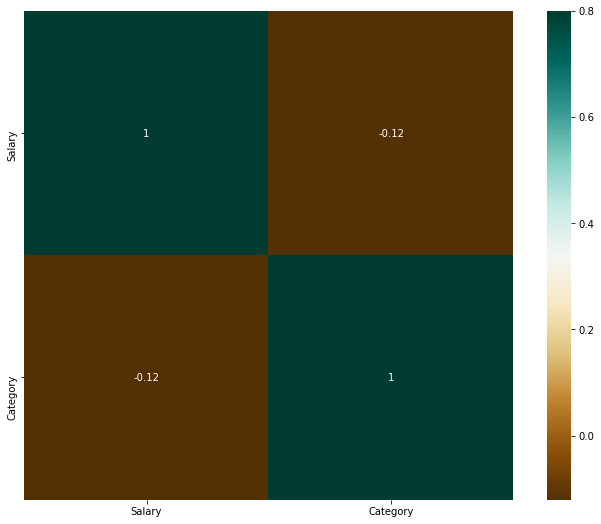

In [66]:

#data.job.replace(0, np.nan, inplace=True)
hmap = data.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

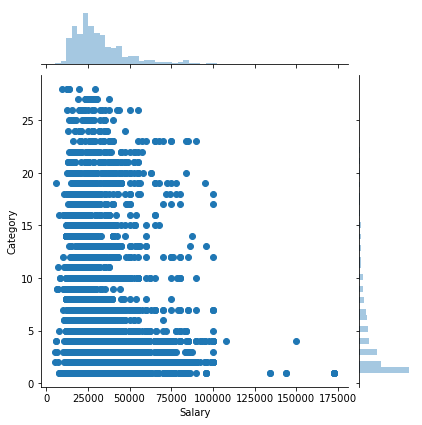

In [67]:

sns.jointplot(y="Category", x="Salary", data=data );

In [68]:
sns.countplot(x='job',data=data,hue='Gender')
sns.distplot(data);

ValueError: Could not interpret input 'Gender'

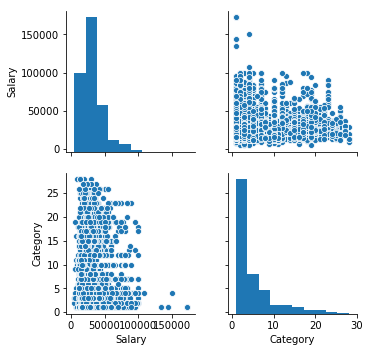

In [69]:
sns.pairplot(data)

In [ ]:
sns.catplot(y="Category", x="Salary", data=data);

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


X=df[['job','Category']].values
y= df[['Salary']].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=21, stratify=y)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('The accuracy of the model is',metrics.accuracy_score(predn,y_test))

In [73]:
#SVM
from sklearn import svm

svc = svm.SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred=svc.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))
print(svc.score(X_test,y_test))

NameError: name 'X_train' is not defined

In [74]:
#Tuning the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid= {'n_neighbors': np.arange(1,80)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
y = y.reshape(30718,)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

ValueError: cannot reshape array of size 10000 into shape (30718,)

In [75]:
#KNN
model=KNeighborsClassifier(n_neighbors=78) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

NameError: name 'X_train' is not defined

In [ ]:
X1=df[['job','Category']].values
y1= df[['Salary']].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1 ,y1, test_size=0.3, random_state=21, stratify=y)

knn1=KNeighborsClassifier(n_neighbors=78) 
knn1.fit(X1_train,y1_train)
prediction=knn1.predict(X1_test)
print('The accuracy of the KNN1 is',metrics.accuracy_score(prediction,y1_test))

In [ ]:
from xgboost import XGBClassifier

X2=df[['job','Category']].values
y2= df[['Salary']].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2 ,y2, test_size=0.3, random_state=21, stratify=y)

# fit model no training data
xgbc = XGBClassifier()
xgbc.fit(X2_train, y2_train)
prediction2=xgbc.predict(X2_test)
print('The accuracy of the xGB is',metrics.accuracy_score(prediction2,y2_test))